In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_test = pd.read_csv("techuklon-int20h/test.csv")
df_train = pd.read_csv("techuklon-int20h/train.csv")
submission_example = pd.read_csv("techuklon-int20h/Samle_Submission.csv")

# EDA

– Handle Missing value | Not implemented for Test data

– Outlier Treatment    | Implemented for Test data (Need to fill nan's)

– Normalizing and Scaling( Numerical Variables)    | Implemented for Test data

– Encoding Categorical variables( Dummy Variables) | Implemented for Test data


In [3]:
print(f"Train shape {df_train.shape}") 
print(f"Test shape {df_test.shape}") 

Train shape (30860, 52)
Test shape (13228, 51)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      30860 non-null  int64  
 1   Week    30860 non-null  int64  
 2   V1      30812 non-null  float64
 3   V2      30812 non-null  float64
 4   V3      23760 non-null  float64
 5   V4      23760 non-null  float64
 6   V5      23760 non-null  float64
 7   V6      23760 non-null  float64
 8   V7      23760 non-null  float64
 9   V8      23760 non-null  float64
 10  V9      23760 non-null  float64
 11  V10     23760 non-null  float64
 12  V11     23760 non-null  float64
 13  V12     23760 non-null  float64
 14  V13     23760 non-null  float64
 15  V14     23760 non-null  float64
 16  V15     23760 non-null  float64
 17  V16     23760 non-null  float64
 18  V17     23760 non-null  float64
 19  V18     23760 non-null  float64
 20  V19     23760 non-null  float64
 21  V20     23760 non-null  float64
 22

In [5]:
features = df_train.columns.drop(['Id','Week','target'])
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27'],
      dtype='object')

<AxesSubplot:xlabel='target', ylabel='count'>

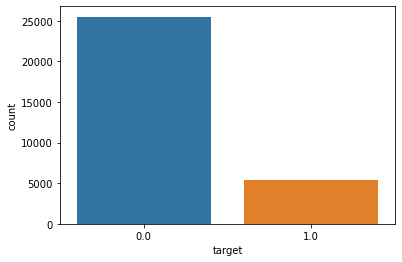

In [6]:
sns.countplot(x=df_train.target)

## Find categorical and numerical values

"Не впевнений, що потрібно розглядати V2 як категоріальну змінну, може ви чот скажете з цього приводу."

In [7]:
df_train[features].nunique()

V1       262
V2        29
V3      3470
V4      3610
V5      1194
V6       635
V7      5063
V8      5060
V9      4264
V10     1217
V11     4206
V12      851
V13      773
V14     2222
V15     3902
V16     3025
V17     2930
V18     3970
V19      936
V20     5165
V21     3197
V22      967
P1       261
P2     20255
P3      2787
P4     27945
P5      4371
P6      2086
P7     22022
P8      1240
P9       975
P10     1347
P11     1616
P12       71
P13     2333
P14    26743
P15     8694
P16     1951
P17    22975
P18    27778
P19     4041
P20       63
P21    26104
P22      928
P23      390
P24    10095
P25     2827
P26     8184
P27     2573
dtype: int64

To define what is categorical and what is continuous variable it's common to set a threshold so if feature has 
less unique values than threshold it is categorical else it is continues.

We suppose that it is ok to set this threshold equal 100. Then only few of our features might be considered as categorical they are: V2, P12, P20. But if we look closer at these features we'll see that P12 and P20 might not be categorical.

In [8]:
df_test['V2'].unique()

array([ 0.,  3.,  2.,  4.,  1.,  6., 13.,  5.,  7.,  8., nan, 10., 16.,
        9., 11., 15., 14., 12., 24., 17., 21., 18., 20., 23.])

In [9]:
df_train['V2'].unique()

array([ 0.,  1.,  9.,  2.,  3.,  4.,  5.,  7.,  6.,  8., 10., 24., 15.,
       14., 11., 12., 16., 17., 13., 26., 18., 23., 20., nan, 22., 19.,
       25., 21., 28., 27.])

In [10]:
df_train['P12'].unique()

array([4.82  , 4.78  , 4.86  , 4.91  , 4.9   , 4.99  , 5.    , 4.97  ,
       4.98  , 4.95  , 4.88  , 4.92  , 4.96  , 4.59  ,    nan, 4.55  ,
       4.89  , 4.69  , 4.68  , 4.71  , 4.94  , 4.84  , 4.87  , 4.93  ,
       4.81  , 4.7   , 4.75  , 4.85  , 4.8   , 4.76  , 4.77  , 4.73  ,
       4.72  , 4.79  , 4.83  , 4.74  , 4.61  , 4.65  , 4.58  , 4.6   ,
       4.33  , 4.66  , 4.67  , 4.62  , 4.64  , 4.56  , 4.46  , 4.51  ,
       4.44  , 4.49  , 4.57  , 4.63  , 4.41  , 4.45  , 4.48  , 4.43  ,
       4.53  , 4.52  , 4.54  , 4.9375, 4.2   , 4.26  , 4.24  , 4.21  ,
       4.32  , 4.3   , 4.38  , 4.31  , 4.42  , 4.5   , 4.47  , 4.39  ])

In [11]:
df_train['P20'].unique()

array([4.82  , 4.94  , 4.91  , 4.92  , 4.93  , 4.99  , 5.    , 4.98  ,
       4.95  , 4.88  , 4.96  , 4.97  , 4.59  ,    nan, 4.89  , 4.7   ,
       4.71  , 4.84  , 4.87  , 4.9   , 4.85  , 4.81  , 4.78  , 4.86  ,
       4.8   , 4.76  , 4.73  , 4.83  , 4.79  , 4.69  , 4.77  , 4.64  ,
       4.65  , 4.72  , 4.68  , 4.74  , 4.75  , 4.66  , 4.67  , 4.58  ,
       4.63  , 4.6   , 4.61  , 4.53  , 4.51  , 4.57  , 4.56  , 4.42  ,
       4.52  , 4.49  , 4.55  , 4.62  , 4.54  , 4.9375, 4.26  , 4.31  ,
       4.24  , 4.36  , 4.43  , 4.5   , 4.44  , 4.46  , 4.48  , 4.39  ])

## Missing values

Filling nans and adding additional column which represents a number of nans in specific row.

In [12]:
df_train.isna().sum()/df_train.shape[0] * 100

Id         0.000000
Week       0.000000
V1         0.155541
V2         0.155541
V3        23.007129
V4        23.007129
V5        23.007129
V6        23.007129
V7        23.007129
V8        23.007129
V9        23.007129
V10       23.007129
V11       23.007129
V12       23.007129
V13       23.007129
V14       23.007129
V15       23.007129
V16       23.007129
V17       23.007129
V18       23.007129
V19       23.007129
V20       23.007129
V21       23.007129
V22       23.007129
P1         9.442644
P2         9.442644
P3         9.439404
P4         9.439404
P5         9.442644
P6         9.442644
P7         9.442644
P8         9.439404
P9         9.439404
P10        9.442644
P11        9.442644
P12        9.442644
P13        9.442644
P14        9.232016
P15        9.442644
P16        9.442644
P17        9.439404
P18        9.442644
P19        9.439404
P20        9.442644
P21        9.439404
P22        9.442644
P23        9.439404
P24        9.442644
P25        9.439404
P26        9.442644


In [13]:
df_train['nan_amount'] = df_train[features].apply(lambda row: row.isna().sum(),axis=1)
df_train["nan_amount"]

0         0
1         0
2         0
3         0
4         0
         ..
30855     0
30856    20
30857    20
30858    20
30859    47
Name: nan_amount, Length: 30860, dtype: int64

In [14]:
df_train.loc[:,'V2']=df_train['V2'].fillna(df_train['V2'].mode()[0])

In [15]:
for feature in features:
    df_train[feature] = df_train.groupby("V2")[feature].transform(lambda x: x.fillna(x.mean()) if (pd.notna(x.mean())) else x.fillna(0))

In [16]:
df_train.isna().sum()/df_train.shape[0] * 100

Id            0.0
Week          0.0
V1            0.0
V2            0.0
V3            0.0
V4            0.0
V5            0.0
V6            0.0
V7            0.0
V8            0.0
V9            0.0
V10           0.0
V11           0.0
V12           0.0
V13           0.0
V14           0.0
V15           0.0
V16           0.0
V17           0.0
V18           0.0
V19           0.0
V20           0.0
V21           0.0
V22           0.0
P1            0.0
P2            0.0
P3            0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
target        0.0
nan_amount    0.0
dtype: float64

## Outlier Treatment

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
iso_clf = IsolationForest(random_state = 1).fit(df_train[features])
df_train.loc[:,'anomaly'] = iso_clf.predict(df_train[features])
df_train['anomaly'].value_counts()


 1    30293
-1      567
Name: anomaly, dtype: int64

In [19]:
df_train = df_train[df_train['anomaly'] == 1]
df_train = df_train.drop(columns=['anomaly'])
df_train.shape

(30293, 53)

In [27]:
# Need to fill nans first;

In [28]:
# df_test.loc[:,'anomaly'] = iso_clf.predict(df_test[features])
# df_test['anomaly'].value_counts()

In [ ]:
# df_test = df_test[df_test['anomaly'] == 1]
# df_test = df_test.drop(columns=['anomaly'])
# df_test.shape

## Normalizing and Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

cat = ['V2']
numerical = features.drop('V2') 

scaler = StandardScaler()
df_train.loc[:,numerical] = scaler.fit_transform(df_train[numerical])
df_test.loc[:,numerical] = scaler.transform(df_test[numerical])

## Encoding (V2 variable)

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
train_v2_encoded = encoder.fit_transform(df_train.loc[:,cat])
test_v2_encoded = encoder.transform(df_test.loc[:,cat])

df_train = pd.concat([df_train.reset_index(),pd.DataFrame.sparse.from_spmatrix(train_v2_encoded)],axis=1)
df_test = pd.concat([df_test.reset_index(),pd.DataFrame.sparse.from_spmatrix(test_v2_encoded)],axis=1)


# ToDO

Речі, які на мою думку є сенс зробити.

1) Нові фічі ( добуток фіч, різниця, сума і тд)

2) Мб варто подивитися на розподіли данних, але не знаю чи це щось дасть

3) Власне модель, бажано з підбором гіперпараметрів.